<a href="https://colab.research.google.com/github/Shankar-Hadimani/PythonforDataScience/blob/master/6.%20Clustering%20and%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement

The primary goal is to develop a Product Categorization model leveraging clustering techniques. By analyzing the E-Commerce dataset provided by The UCI Machine Learning Repository, this model aims to automatically group products into meaningful categories based on their features, such as product description, price, customer reviews, and more.

The dataset contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retailer.

The dataset contains the following columns:
- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

The notebook contains 4 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)

## Steps to follow

- **Load the Dataset**: Use Pandas to read the CSV file.
- **Preprocess the Data**: Clean and preprocess the Description text data.
- **Feature Extraction**: Use TF-IDF to convert text descriptions into a vectorized format.
- **Clustering**: Apply the K-Means algorithm to cluster products into categories based on their descriptions.
- **Dimensionality Reduction for Visualization**: Use PCA to reduce the dimensions of the TF-IDF vectors for visualization.
- **Visualize Clusters**: Create a 3D scatter plot of the clusters.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving clustering-data.csv to clustering-data.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


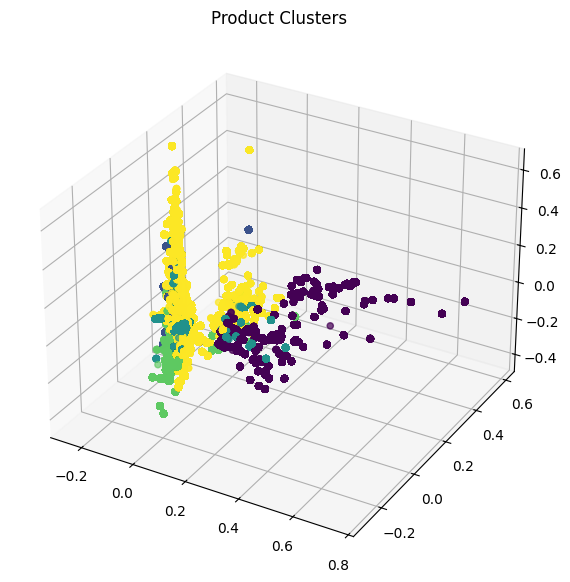

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Step 2: Load the Dataset
# Update this path to where you have stored the dataset
df = pd.read_csv('clustering-data.csv', encoding='latin1')

# Step 3: Preprocess the Data
def preprocess_text(text):
    # Tokenize, remove stopwords, and keep only alphabetic words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Step 4: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Step 5: Clustering
num_clusters = 5  # You might want to adjust this based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Step 7: Visualize Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters, cmap='viridis')
ax.set_title('Product Clusters')
plt.show()


 Visualise most frequent words occurring in product descriptions assigned to clusters.

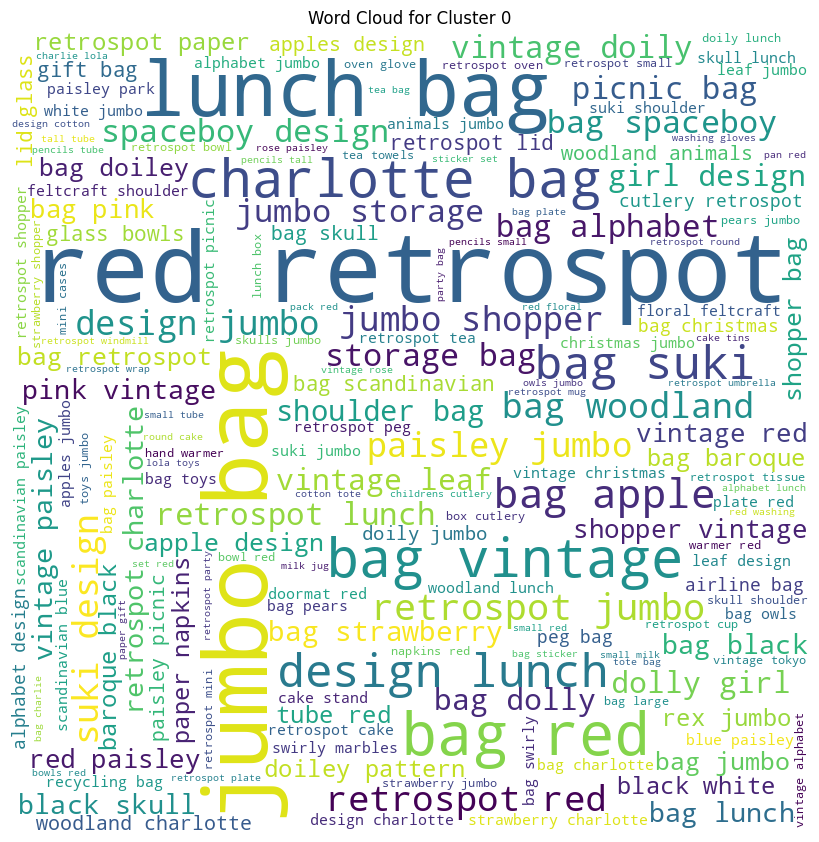

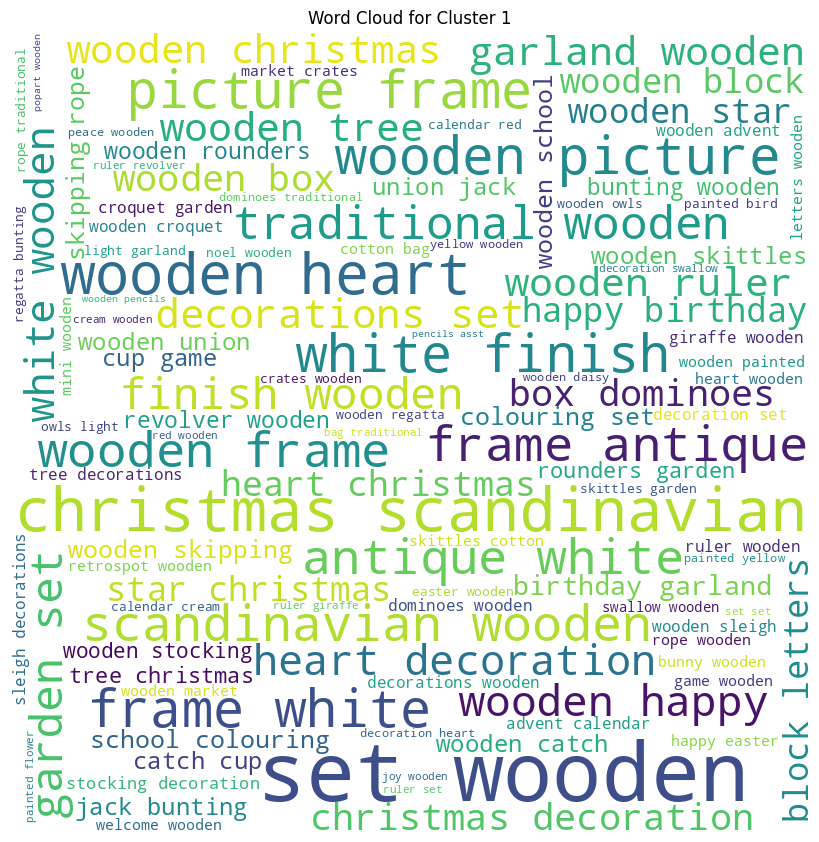

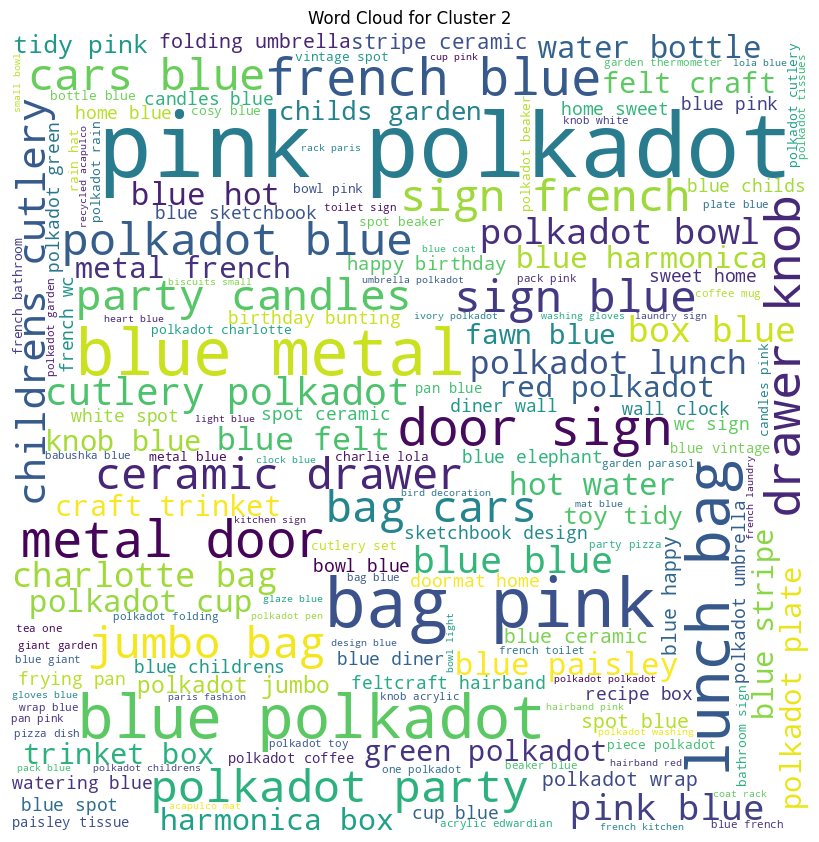

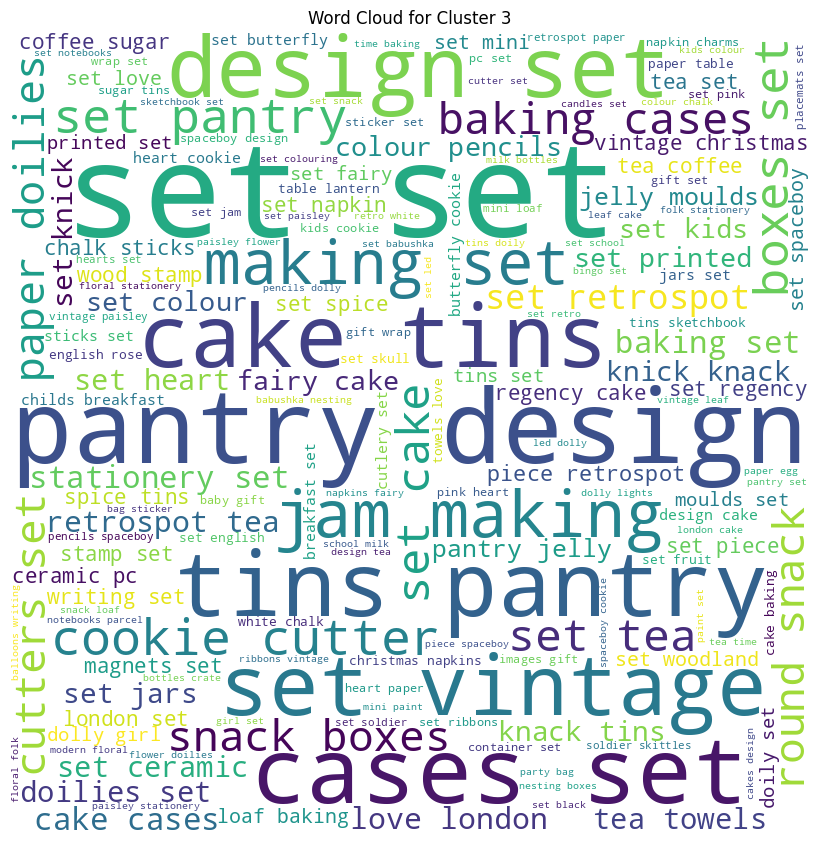

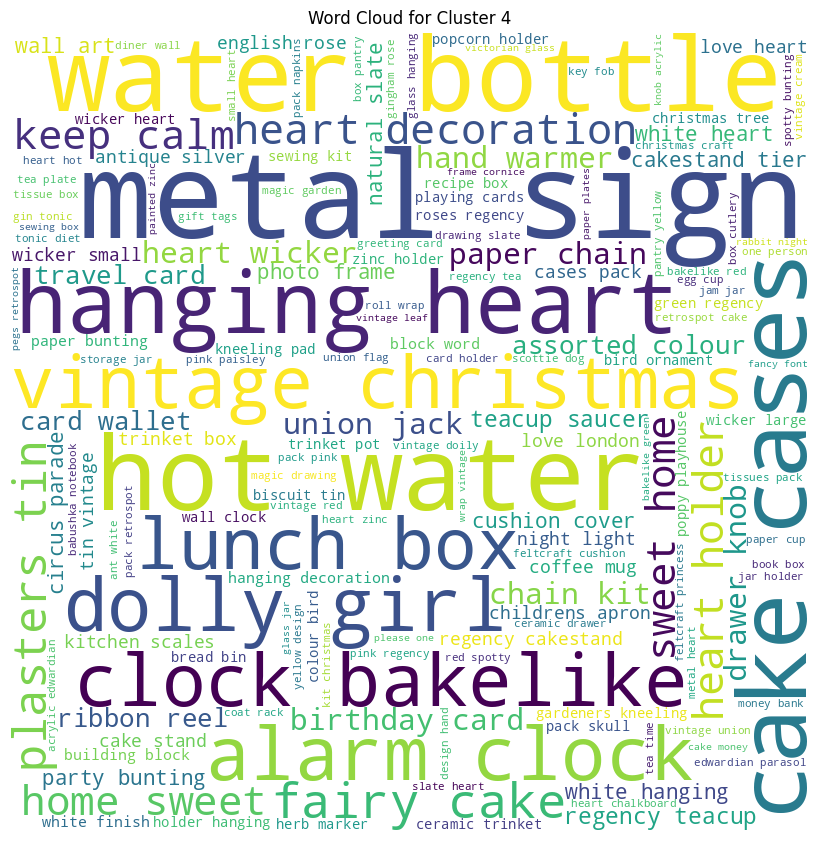

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds(n_clusters, cluster_assignments, documents):
    """
    Generates and displays word clouds for each cluster.

    Parameters:
    - n_clusters (int): Number of clusters.
    - cluster_assignments (array-like): Cluster assignment for each document.
    - documents (array-like): Preprocessed text documents.
    """
    # Iterate through each cluster
    for cluster in range(n_clusters):
        # Filter documents belonging to the current cluster
        cluster_documents = [doc for doc, assignment in zip(documents, cluster_assignments) if assignment == cluster]

        # Join documents into a single string
        text = " ".join(cluster_documents)

        # Generate a word cloud
        wordcloud = WordCloud(width = 800, height = 800,
                              background_color ='white',
                              stopwords = stopwords.words('english'),
                              min_font_size = 10).generate(text)

        # Plot the word cloud
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(f'Word Cloud for Cluster {cluster}')
        plt.show()

# Example usage
generate_word_clouds(num_clusters, clusters, df['Processed_Description'].dropna().tolist())


<a name="ex_1"></a>
## Exercise 1

Use the describe() function to generate descriptive statistics of the dataset.

This function provides a concise summary of the columns, including count, mean, standard deviation, min, max, and quartile values.

**Questions**:
- What insights can you derive from the output of the describe() method regarding the scale of the data and its distribution?
- How might these statistics influence your preprocessing decisions?

**Answer**:

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Insights from `df.describe()` Output**

## **Scale of the Data**
- The **Quantity** column has extreme values, ranging from **-80,995 to 80,995**, with a mean of **9.55** and a standard deviation of **218.08**. The high standard deviation and extreme min/max values suggest **significant variability and the presence of outliers**.
- The **UnitPrice** column also has extreme values, from **-11,062.06 to 38,970**. The **negative values indicate possible errors or refunds**.
- The **CustomerID** column ranges from **12,346 to 18,287**, indicating that this field likely represents **unique customer identifiers rather than continuous numerical data**.

## **Distribution Insights**
- The **large difference between the mean and the 50% (median) value for Quantity and UnitPrice** suggests a **skewed distribution**. The presence of extreme values is also evident from the wide range and high standard deviation.
- The **negative values in Quantity and UnitPrice** suggest possible issues such as **returns, incorrect entries, or specific business logic** that needs further investigation.
- The **CustomerID column has fewer unique values (406,829)** compared to the total count of transactions (541,909), indicating that **some customers made multiple purchases**.

---

# **Impact on Preprocessing Decisions**
## **1. Handling Outliers**
- Given the **extreme values** in **Quantity** and **UnitPrice**, an outlier detection method (**IQR filtering or Z-score**) should be applied to **remove or cap unreasonable values**.
- **Negative values** in **Quantity** and **UnitPrice** might indicate **refunds or errors**. These need **domain knowledge** to determine whether they should be **removed, converted, or categorized separately**.

## **2. Feature Engineering Considerations**
- The **skewed distribution** suggests that using **transformations like log or Box-Cox** might help **normalize the data** for machine learning models.
- **CustomerID is categorical** and should not be treated as a **continuous numerical variable**. It might be used for **customer segmentation instead**.

## **3. Data Cleaning Needs**
- **Negative prices and quantities** require **validation against business rules**. If they indicate **returns**, they should be **handled separately**.
- **Missing CustomerID values** (as count is lower than total records) should be **checked**. If many are missing, it may indicate **guest checkouts or data collection issues**.

## **4. Rescaling Considerations**
- The **UnitPrice values vary significantly**, meaning **normalization (Min-Max Scaling) or standardization (Z-score)** may be needed before applying models that assume normally distributed features.

---

# **Recommendations**
✅ **Investigate and handle negative values** appropriately.  
✅ **Apply outlier detection and transformation** to **Quantity** and **UnitPrice**.  
✅ **Ensure categorical treatment of CustomerID** instead of numerical analysis.  
✅ **Check missing values in CustomerID** and decide on an **imputation strategy**.  
✅ **Consider normalizing the skewed data** before feeding it into ML models.  



<a name="ex_2"></a>
## Exercise 2

- In the code block above, what does apply function do?

- In the code block above, why is the number of clusters = 5?

- In the code block above, change the random_state=42 to values such as 80, 100, or 120 and explain how does it impact the results of the kmeans model?


**Answer**:

# **Exercise 2: Answers**

## **1. What does the `apply` function do?**
- The `apply` function is used to **apply the `preprocess_text` function** to every non-null value in the `Description` column.
- This function tokenizes the text, removes stopwords, and keeps only alphabetic words.
- The line of code:
  ```python
  df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)
---

## **2. Why is the number of clusters = 5?**
The number of clusters (`num_clusters = 5`) is an **arbitrary choice** that is often determined through **experimentation**.

### **Possible Reasons for Choosing 5 Clusters**
- **Domain knowledge** (e.g., if we expect 5 major product categories).
- **Prior experiments** that showed reasonable grouping with 5 clusters.
- **Default assumption** for initial clustering, which can later be fine-tuned.

### **How to Determine a Better Number of Clusters?**
✅ **Use the Elbow Method**:  
   - Plots the **inertia (within-cluster variance)** for different cluster sizes.  
   - Helps find the point where the decrease **slows down**, indicating the optimal number of clusters.

✅ **Use the Silhouette Score**:  
   - Measures **how well-separated the clusters are**.  
   - Higher scores indicate **better-defined clusters**.

✅ **Perform Cross-Validation**:  
   - Compare results with **different `k` values**.  
   - Evaluate consistency across different runs.  
---

## **3. Effect of Changing `random_state` in KMeans**
The `random_state` controls the **initialization of centroids** in KMeans. Changing its value affects:
- **How initial cluster centers are placed**.
- **How the clustering converges**.
- **The final grouping of points**.


### ** Takeaways**
✅ If **`random_state` is fixed**, results are **reproducible**.  
✅ If **`random_state` is changed**, results may vary due to different **initial centroid positions**.  
✅ When clustering, it’s good practice to run **multiple initializations** (e.g., `n_init=10`) to get a more **stable clustering solution**.  


<a name="ex_3"></a>
## Exercise 3

- When is PCA needed ?
- How is the number of Dimensions calculated ?

**Answer**:

# **Exercise 3: Answers**

# **When is PCA Needed?**
Principal Component Analysis (PCA) is used when:
- The dataset has **high-dimensional features**, making visualization or computation difficult.
- There is a need to **reduce noise and redundancy** in the dataset.
- The model suffers from the **curse of dimensionality**, leading to overfitting or slow processing.
- **Feature selection or extraction** is required to improve performance.
- **Visualization** is needed (e.g., reducing data to **2D or 3D** for better cluster interpretation).

---

# **How is the Number of Dimensions Calculated in PCA?**
The number of dimensions (principal components) is determined by:
1. **Explained Variance Ratio**:
   - PCA computes the **variance explained by each principal component**.
   - The **cumulative explained variance** is used to decide the optimal number of components.
   - A common threshold is **95% explained variance**.
  
2. **Eigenvalues & Eigenvectors**:
   - The number of components is chosen based on **eigenvalues**.
   - Only components with **significant eigenvalues** are retained.

3. **Elbow Method for PCA**:
   - Similar to clustering, plotting the **explained variance vs. number of components** helps identify an "elbow point."
   - The point where the curve flattens suggests the **optimal number of dimensions**.

<a name="ex_4"></a>
## Exercise 4

- Compare the results from applying Kmeans directly to the processed dataset with results after applying PCA.
- What do you conclude ?

**Answer**:

# **Comparison: KMeans on Raw Data vs. KMeans After PCA**
Applying KMeans directly to the **processed dataset** and after **applying PCA** can yield different results. Below is a comparison:

---

## **1. KMeans Applied Directly to the Processed Dataset**
### **Pros:**
✅ Uses **all original features**, potentially capturing more information.  
✅ Works well when data has **low dimensions** and clear cluster separation.  

### **Cons:**
❌ High-dimensional data can cause **overfitting** and **poor clustering**.  
❌ **Curse of dimensionality** affects cluster quality and distances between points.  
❌ **Computational cost increases** significantly with more features.  

---

## **2. KMeans After Applying PCA**
### **Pros:**
✅ **Reduces dimensionality**, making KMeans more efficient.  
✅ **Removes noise and redundant features**, improving cluster separation.  
✅ Helps **visualize clusters** in **2D or 3D** for better interpretation.  

### **Cons:**
❌ PCA may remove **some variance**, leading to a loss of minor but meaningful details.  
❌ Choosing the **right number of components** is crucial for **optimal clustering**.  

---

# **What Do We Conclude?**
- If the dataset is **high-dimensional**, applying **PCA before KMeans** improves performance and clustering accuracy.  
- If the dataset has **few dimensions**, KMeans can be applied **directly** without significant loss of efficiency.  
- **PCA helps in visualization** and **removes noise**, making it easier to interpret the clusters.  
- The **best approach depends on dataset complexity**, and **experimentation with both methods is recommended**.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


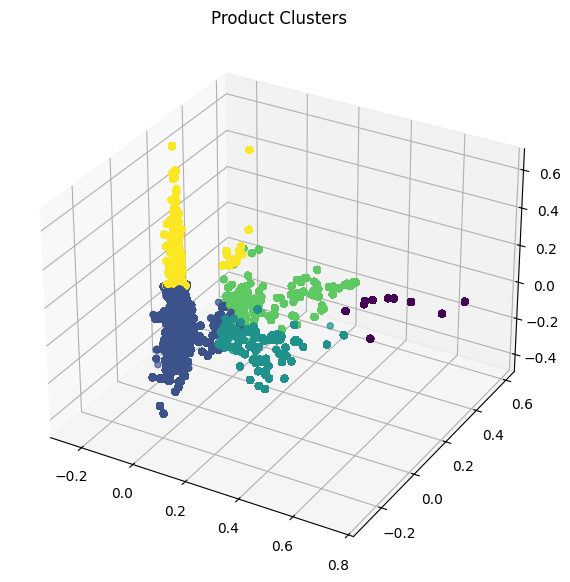

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Step 2: Load the Dataset
# Update this path to where you have stored the dataset
df = pd.read_csv('clustering-data.csv', encoding='latin1')

# Step 3: Preprocess the Data
def preprocess_text(text):
    # Tokenize, remove stopwords, and keep only alphabetic words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying the preprocessing function to the Description column
df['Processed_Description'] = df['Description'].dropna().apply(preprocess_text)

# Step 4: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'].dropna())

# Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Step 5: Clustering
num_clusters = 5  # You might want to adjust this based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(reduced_features)



# Step 7: Visualize Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2],
                     c=clusters, cmap='viridis')
ax.set_title('Product Clusters')
plt.show()
